# Malware Analysis using Machine Learning

In [32]:
#Credit:https://github.com/aayuv17/Malware-Analysis   

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
print('#########################################\n')
print('#Malware Analysis using Machine Learning#\n')
print('#########################################\n')

#########################################

#Malware Analysis using Machine Learning#

#########################################



In [31]:
print('###################################################################################################################\n')
print('#The classification algorithms: Gaussian Naive Bayes, RandomForestClassifier, DecisionTreeClassifier & Linear SVC.#\n')
print('###################################################################################################################\n')

###################################################################################################################

#The classification algorithms: Gaussian Naive Bayes, RandomForestClassifier, DecisionTreeClassifier & Linear SVC.#

###################################################################################################################



In [4]:
data = pd.read_csv('dataset_malwares.csv', sep=',')

In [5]:
data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [6]:
data.shape

(19611, 79)

In [7]:
data.isnull().sum()

Name                            0
e_magic                         0
e_cblp                          0
e_cp                            0
e_crlc                          0
                               ..
ImageDirectoryEntryExport       0
ImageDirectoryEntryImport       0
ImageDirectoryEntryResource     0
ImageDirectoryEntryException    0
ImageDirectoryEntrySecurity     0
Length: 79, dtype: int64

In [8]:
data["Malware"].value_counts()

1    14599
0     5012
Name: Malware, dtype: int64

C:\Users\CICI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


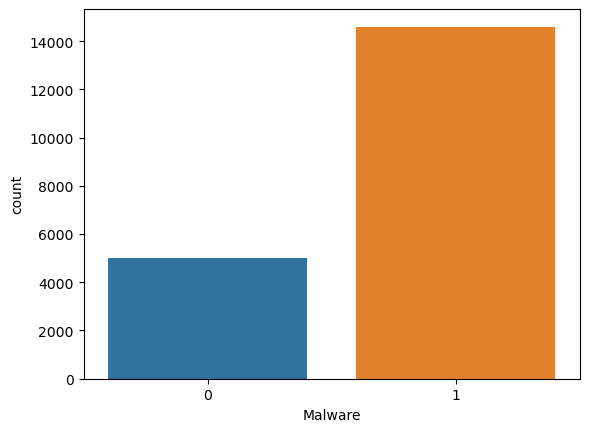

In [9]:
sns.countplot(data["Malware"])
plt.show()

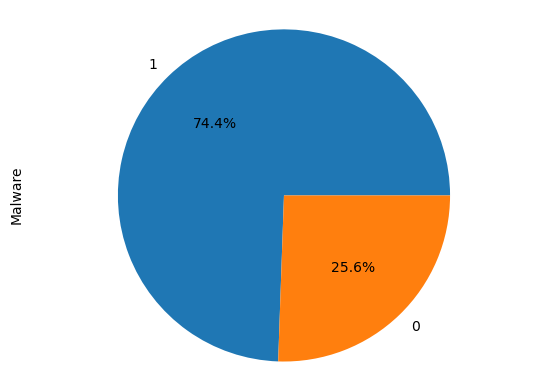

In [10]:
data["Malware"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [12]:
Data=data.dropna(how="any",axis=0)
Data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [13]:
X = Data.drop(['Name','Malware','e_magic','e_cblp','e_cp','e_crlc','e_cparhdr','e_minalloc','e_maxalloc','e_ss','e_sp','e_csum','e_ip','e_cs','e_lfarlc','e_ovno','e_oemid','e_lfanew','e_oeminfo'],axis=1)
Y = Data['Malware']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.head()

,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
17893,332,5,1377139106,0,0,224,8450,267,11,0,...,3221225536,0,22,131,30,4752,275044,282624,0,0
5886,332,8,1444487823,0,0,224,33167,267,2,25,...,3221225536,0,11,120,0,0,102400,114688,0,4155064
17817,332,5,1377142686,0,0,224,8450,267,11,0,...,3221225536,0,11,315,3,163264,173336,180224,0,0
5511,332,10,708992537,0,0,224,33166,267,2,25,...,3221225536,0,20,536,0,0,1675264,1839104,0,0
2706,332,7,1386789760,0,0,224,783,267,2,56,...,3227516992,0,2,43,0,0,65536,77824,0,91136


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [16]:
#performing Gaussian Naive Bayes on the training data
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [17]:
gnb.fit(X_scaled, Y_train)

GaussianNB()

In [18]:
Y_pred=gnb.predict(X_test)

C:\Users\CICI\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [19]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 32.24573030843742


In [20]:
#accuracy is quite low using Naive Bayes algorithm.
#creating new dataframe to implement Random Forest Classifier
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()

,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,-0.392155,-0.016538,0.325785,-0.052302,-0.060402,-0.36258,0.307327,-0.392153,0.226389,-0.291134,...,0.099546,0.0,2.039182,0.230372,0.099510,-0.016337,-0.027940,-0.075525,-0.022022,-0.041694
1,-0.392155,1.385853,0.559229,-0.052302,-0.060402,-0.36258,2.913874,-0.392153,-0.691993,1.139815,...,0.099546,0.0,0.627385,0.143536,-0.090459,-0.016531,-0.063052,-0.129191,-0.022022,0.156339
2,-0.392155,-0.016538,0.325797,-0.052302,-0.060402,-0.36258,0.307327,-0.392153,0.226389,-0.291134,...,0.099546,0.0,0.627385,1.682895,-0.071462,-0.009836,-0.048625,-0.108248,-0.022022,-0.041694
3,-0.392155,2.320780,-1.990146,-0.052302,-0.060402,-0.36258,2.913769,-0.392153,-0.691993,1.139815,...,0.099546,0.0,1.782492,3.427501,-0.090459,-0.016531,0.256838,0.421864,-0.022022,-0.041694
4,-0.392155,0.918389,0.359236,-0.052302,-0.060402,-0.36258,-0.501202,-0.392153,-0.691993,2.914192,...,0.110306,0.0,-0.527722,-0.464313,-0.090459,-0.016531,-0.070550,-0.140971,-0.022022,-0.037351


In [21]:
#using Principal Component Analysis to increase interpretability
from sklearn.decomposition import PCA
skpca = PCA(n_components=60)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  1.0000000000000002


In [22]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
model = RFC(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16, 
                         max_features = 'sqrt')
model.fit(X_pca, Y_train)

X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

Y_pred = model.predict(X_test_pca)
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       960
           1       0.99      0.99      0.99      2963

    accuracy                           0.98      3923
   macro avg       0.98      0.98      0.98      3923
weighted avg       0.98      0.98      0.98      3923



In [24]:
print("Random Forest model accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

Random Forest model accuracy(in %): 98.44506755034412


<AxesSubplot:>

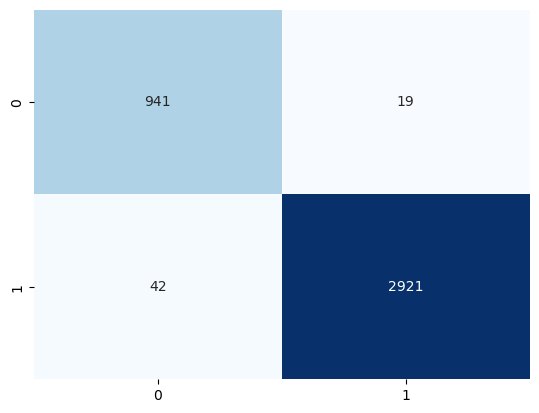

In [25]:
sns.heatmap(confusion_matrix(Y_pred, Y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_scaled,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)*100)

Accuracy: 71.32296711700229


C:\Users\CICI\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [27]:
X_scaled=scaler.fit_transform(X)
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict 
svm=SVC(kernel="linear")
Y_pred = cross_val_predict(svm, X_scaled, Y, cv=10)
conf_mat = confusion_matrix(Y, Y_pred)
print(conf_mat)

[[ 4553   459]
 [  312 14287]]


In [28]:
print("Linear SVC Classifier accuracy(in %):", metrics.accuracy_score(Y, Y_pred)*100)

Linear SVC Classifier accuracy(in %): 96.06853296619245
